# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [1]:
from google.colab import drive
drive.mount('/content/Anton', force_remount=True)

Mounted at /content/Anton


In [2]:
import os

project_path = "/content/Anton/My Drive/Colab Notebooks/NLP/Sequence Model Using NLP/"
os.chdir(project_path)
print(os.getcwd())

/content/Anton/My Drive/Colab Notebooks/NLP/Sequence Model Using NLP


In [3]:
import pandas as pd
df = pd.read_csv(os.path.join(project_path,'daily-minimum-temperatures-in-me.csv'))

### Print the data
- First 5 rows only

In [4]:
df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [5]:
df.set_index('Date', inplace=True)

## Question 2

### Check the total count of null values in the data

In [6]:
df.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [7]:
df.dropna(inplace=True)

## Question 3

### Describe your dataframe
- use describe() method

In [8]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

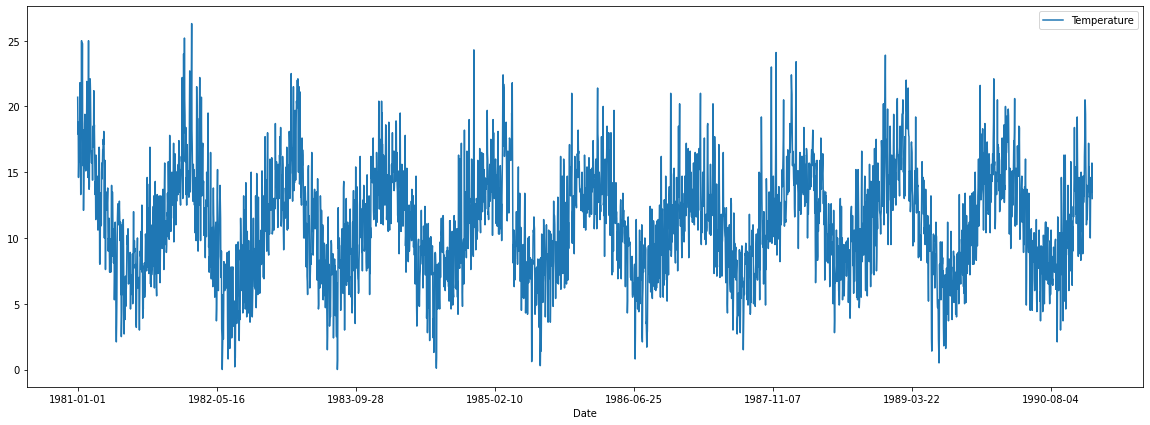

In [9]:
df.plot(figsize=(20,7))

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f066c7884a8>]],
      dtype=object)

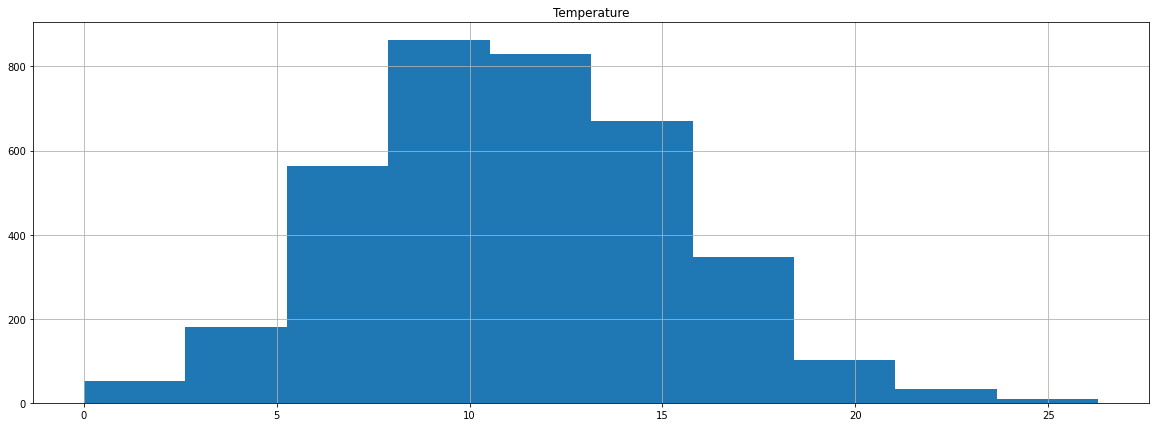

In [10]:
df.hist(figsize=(20,7))

### Check minimum and maximum temperature
- use min() and max() methods

In [11]:
print("Min temperature recorded {}.".format(df.min()[0]))

Min temperature recorded 0.0.


In [12]:
print("Maximum temperature recorded {}.".format(df.max()[0]))

Maximum temperature recorded 26.3.


## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [13]:
from sklearn.model_selection import train_test_split as tts

train, test = tts(df, shuffle=False, test_size=0.25, random_state=23)

In [14]:
train.shape

(2737, 1)

In [15]:
test.shape

(913, 1)

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [16]:
from sklearn.preprocessing import MinMaxScaler as mms

scaler = mms(feature_range=(0, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

### Print scaled train and test data
- print only first 5 values

In [17]:
print("First 5 values of scaled train data \n")
train_sc[0:5]

First 5 values of scaled train data 



array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [18]:
print("First 5 values of scaled test data\n")
test_sc[0:5]

First 5 values of scaled test data



array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [19]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [20]:
X_train, y_train = create_seq_data(train_sc, 1)
X_test, y_test = create_seq_data(test_sc, 1)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Print shape of data
- print shape of X_train and X_test

In [22]:
X_train.shape

(2736, 1, 1)

In [23]:
X_test.shape

(912, 1, 1)

## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
batch_size = 1
look_back = 1

model = Sequential()
model.add(LSTM(32,batch_input_shape = (batch_size,look_back,1),stateful = True))
model.add(Dense(1, activation='sigmoid'))

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [25]:
from tensorflow.keras.metrics import MeanSquaredError
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

### summarize your model
- use summary() method

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 32)                   4352      
_________________________________________________________________
dense (Dense)                (1, 1)                    33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [27]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 2/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 3/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 4/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 5/50
2736/2736 [==============================] - 5s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 6/50
2736/2736 [==============================] - 4s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 7/50
2736/

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [28]:
trainpred = model.predict(X_train, batch_size = 1)

In [29]:
trainpred[:10]

array([[0.66117257],
       [0.60059035],
       [0.6276524 ],
       [0.52140343],
       [0.5585169 ],
       [0.5549359 ],
       [0.5554033 ],
       [0.5946442 ],
       [0.68224764],
       [0.64899904]], dtype=float32)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [30]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [31]:
testpred = model.predict(X_test, batch_size=1)

In [32]:
testpred[:10]

array([[0.40121958],
       [0.3453395 ],
       [0.28853422],
       [0.27591977],
       [0.36923558],
       [0.47763819],
       [0.48627082],
       [0.43520823],
       [0.29851422],
       [0.3241409 ]], dtype=float32)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [44]:
trainpred_label = scaler.inverse_transform(trainpred)

In [45]:
traintrue_label = scaler.inverse_transform([y_train])
traintrue_label = traintrue_label.T

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [46]:
testpred_label = scaler.inverse_transform(testpred)

In [47]:
testtrue_label = scaler.inverse_transform([y_test])
testtrue_label = testtrue_label.T

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [48]:
from sklearn.metrics import mean_squared_error
train_RMSE = np.sqrt(mean_squared_error(traintrue_label, trainpred_label))
print(train_RMSE)

2.622454262415357


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [49]:
from sklearn.metrics import mean_squared_error
test_RMSE = np.sqrt(mean_squared_error(testtrue_label, testpred_label))
print(test_RMSE)

2.5446385443116246
